# Brief Introduction to Pandas

### Limitations of using numpy for tabular data

We have seen how to use numpy to import tabular data stored in a CSV file

In [1]:
import numpy as np

data = np.loadtxt('data.csv', delimiter=',', skiprows=1)

data

array([[  2.00000000e+02,   2.40000000e+02],
       [  4.00000000e+02,   5.60000000e+02],
       [  6.00000000e+02,   2.60000000e+08]])

In [2]:
!cat data.csv

"depth", "some_variable"
200, 2.4e2
400, 5.6e2
600, 2.6e8

However, there are two limitations in using numpy for tabular data:

- numpy arrays just stores the data, not the metadata (columns names, row index)
- a numpy array has a single data type (e.g., integer, float), while tables may have columns of data with different types

### Here comes Pandas

- Pandas (http://pandas.pydata.org/) is a widely-used Python library to handle tabular data
  - read from / write to different formats (CSV...)
  - analytics, statistics, tansformations, plotting (on top of matplotlib).


- Borrows many features from R’s dataframes.
    - A 2-dimenstional table whose columns have names and potentially have different data types.

We first import the library

In [3]:
import pandas as pd

In [4]:
pd.__version__

'0.20.3'

## A real example

First, look at the real dataset of land-surface temperature (region averages) that we will use in the project:

http://berkeleyearth.org/data/

http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/

This is a good example of real dataset used in science: text format, good documentation, human readable but a bit harder to deal with progammatically (e.g., column names as comments instead of strict CSV).

Start by importing the packages that we will need for the project.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Load the data (a single region/file ; we won't use all the columns available). Note that we can provide an URL to `pandas.read_csv` !

In [20]:
df_raw = pd.read_csv(
    "http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/united-states-TAVG-Trend.txt",
    comment="%",
    delim_whitespace=True,
    header=None,
    usecols=(0, 1, 2, 3, 8, 9),
    names=("year", "month", "anomaly", "uncertainty",
           "10-year-anomaly", "10-year-uncertainty"),
    parse_dates=[[0, 1]],
    index_col=0,
)

df_raw.index.name = "date"

df_raw

,anomaly,uncertnainty,10-year-anomaly,10-year-uncertainty
date,,,,
1768-09-01,-0.850,2.880,NaN,NaN
1768-10-01,-1.578,3.386,NaN,NaN
1768-11-01,-1.199,3.783,NaN,NaN
1768-12-01,-0.522,4.979,NaN,NaN
1769-01-01,0.118,4.856,NaN,NaN
1769-02-01,-0.934,3.311,NaN,NaN
1769-03-01,-0.342,3.884,NaN,NaN
1769-04-01,0.783,3.482,NaN,NaN
1769-05-01,1.824,4.795,NaN,NaN


In [21]:
df = pd.read_csv(
    "http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/united-states-TAVG-Trend.txt",
    delim_whitespace=True,
    comment='%',
    header=None,
    parse_dates=[[0,1]],
    index_col=(0),
    usecols=(0, 1, 2, 3, 8, 9),
    names=("year", "month", "anomaly", "uncertainty", "10-year-anomaly", "10-year-uncertainty")
)

df.index.name = "date"

In [22]:
df

,anomaly,uncertainty,10-year-anomaly,10-year-uncertainty
date,,,,
1768-09-01,-0.850,2.880,NaN,NaN
1768-10-01,-1.578,3.386,NaN,NaN
1768-11-01,-1.199,3.783,NaN,NaN
1768-12-01,-0.522,4.979,NaN,NaN
1769-01-01,0.118,4.856,NaN,NaN
1769-02-01,-0.934,3.311,NaN,NaN
1769-03-01,-0.342,3.884,NaN,NaN
1769-04-01,0.783,3.482,NaN,NaN
1769-05-01,1.824,4.795,NaN,NaN


In [24]:
df.head(n=8)

,anomaly,uncertainty,10-year-anomaly,10-year-uncertainty
date,,,,
1768-09-01,-0.850,2.880,NaN,NaN
1768-10-01,-1.578,3.386,NaN,NaN
1768-11-01,-1.199,3.783,NaN,NaN
1768-12-01,-0.522,4.979,NaN,NaN
1769-01-01,0.118,4.856,NaN,NaN
1769-02-01,-0.934,3.311,NaN,NaN
1769-03-01,-0.342,3.884,NaN,NaN
1769-04-01,0.783,3.482,NaN,NaN


In [25]:
df.describe()

,anomaly,uncertainty,10-year-anomaly,10-year-uncertainty
count,2482.000000,2482.000000,2310.000000,2310.000000
mean,-0.141883,0.831177,-0.149871,0.184629
std,1.092493,0.929671,0.414751,0.178210
min,-4.298000,0.053000,-1.222000,0.014000
25%,-0.765000,0.178000,-0.436000,0.044000
50%,-0.131000,0.342500,-0.260000,0.094000
75%,0.525750,1.275750,0.112000,0.329750
max,4.244000,5.337000,1.015000,0.627000


In [26]:
df.T

date,1768-09-01 00:00:00,1768-10-01 00:00:00,1768-11-01 00:00:00,1768-12-01 00:00:00,1769-01-01 00:00:00,1769-02-01 00:00:00,1769-03-01 00:00:00,1769-04-01 00:00:00,1769-05-01 00:00:00,1769-06-01 00:00:00,...,2012-12-01 00:00:00,2013-01-01 00:00:00,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00
anomaly,-0.85,-1.578,-1.199,-0.522,0.118,-0.934,-0.342,0.783,1.824,2.163,...,1.099,1.915,0.534,0.119,-1.090,0.173,1.428,0.574,0.668,2.003
uncertainty,2.88,3.386,3.783,4.979,4.856,3.311,3.884,3.482,4.795,2.613,...,0.228,0.185,0.216,0.222,0.221,0.178,0.236,0.152,0.249,1.210
10-year-anomaly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-year-uncertainty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df['anomaly_norm'] = ((df['anomaly'] - df['anomaly'].mean())
                      / df['anomaly'].std())

df.tail()

,anomaly,uncertainty,10-year-anomaly,10-year-uncertainty,anomaly_norm
date,,,,,
2013-05-01,0.173,0.178,NaN,NaN,0.288224
2013-06-01,1.428,0.236,NaN,NaN,1.436972
2013-07-01,0.574,0.152,NaN,NaN,0.655274
2013-08-01,0.668,0.249,NaN,NaN,0.741316
2013-09-01,2.003,1.210,NaN,NaN,1.963291


In [36]:
df.loc['2010':'2013', 'anomaly':'10-year-anomaly'].mean()

anomaly            0.923622
uncertainty        0.208733
10-year-anomaly         NaN
dtype: float64

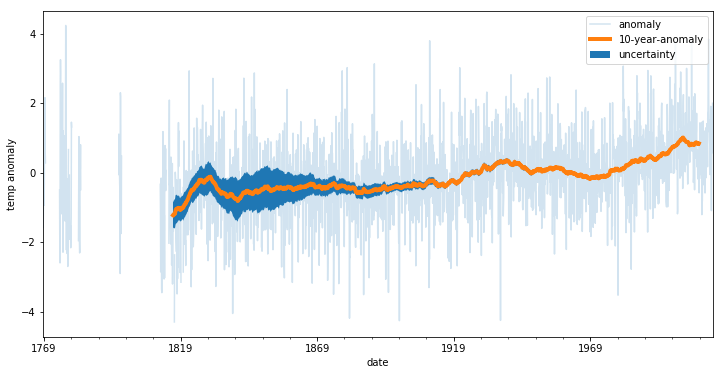

In [64]:
fig, myax = plt.subplots(figsize=(12, 6))

df['anomaly'].plot(ax=myax, alpha=0.2)
df['10-year-anomaly'].plot(ax=myax, linewidth=4)

upper = df["10-year-anomaly"] + df["10-year-uncertainty"]
lower = df["10-year-anomaly"] - df["10-year-uncertainty"]

fb = myax.fill_between(lower.index, lower, upper);

fb.set_label('uncertainty')

myax.set(ylabel="temp anomaly");

myax.legend(loc='upper right')

In [76]:
def plot_temp_anomaly(country_name):
    url = ("http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/"
           "{}-TAVG-Trend.txt".format(country_name.lower()))
    
    df = pd.read_csv(
        url,
        delim_whitespace=True,
        comment='%',
        header=None,
        parse_dates=[[0,1]],
        index_col=(0),
        usecols=(0, 1, 2, 3, 8, 9),
        names=("year", "month", "anomaly", "uncertainty", "10-year-anomaly", "10-year-uncertainty")
    )

    df.index.name = "date"

    fig, myax = plt.subplots(figsize=(12, 6))

    df['anomaly'].plot(ax=myax, alpha=0.2)
    df['10-year-anomaly'].plot(ax=myax, linewidth=4)

    upper = df["10-year-anomaly"] + df["10-year-uncertainty"]
    lower = df["10-year-anomaly"] - df["10-year-uncertainty"]

    fb = myax.fill_between(lower.index, lower, upper)

    fb.set_label('uncertainty')

    myax.set(ylabel="temp anomaly", ylim=(-5, 5))

    myax.legend(loc='upper right')

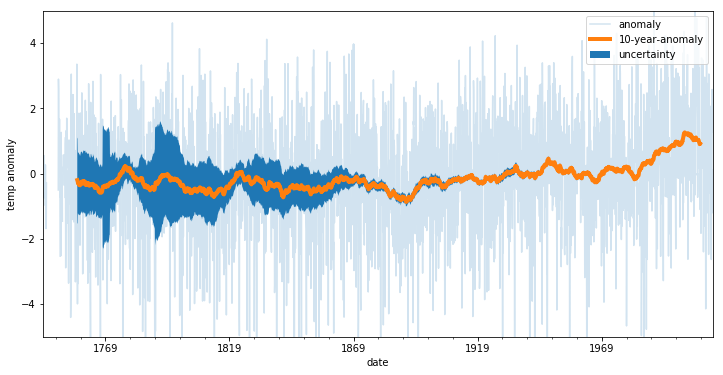

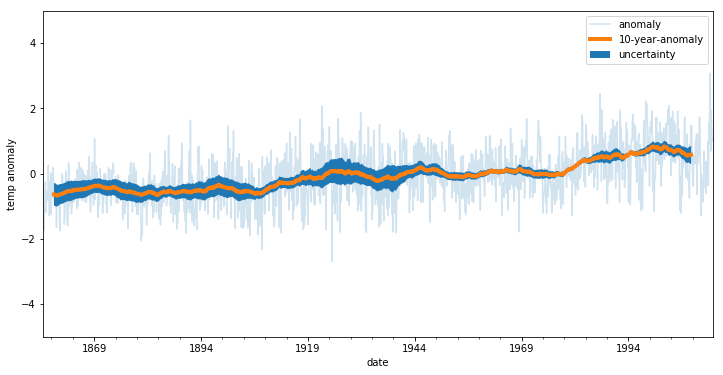

In [77]:
for name in ["belgium", "namibia"]:
    plot_temp_anomaly(name)

## First exercice: data inspection, basic statistics and plotting

Objectives:

1. show the head and a sample of the data
2. plot the data
    * plot 'anomaly', playing around with `linewidth` and opacity (`alpha`)
    * plot '10-year-anomaly'
    * plot '10-year-uncertainty' around it (`plt.fill_between`)
    * try adjusting the size of the figure
* statistics of 'anomaly'
    * print descriptive statistics, print the mean of each column
    * plot distribution of 'anomaly' using `hist`, playing around with `bins`
    * plot distribution of 'anomaly' separated by years but in one plot
        1. 1850-1900
        2. 1950-2000

### Solution

## Second exercise: more advanced pandas analytics features 

Try re-calculating the 10-year anomaly from the anomaly (rolling mean) using pandas. Assign the results to a new column '10-year-anomaly-pandas' in the dataframe. Compare in a plot these results with the '10-year-anomaly' column.

Tip: look at `rolling` and `mean` in the pandas documentation.

### Solution

## Reuse the code for other data (countries)

create a function that take a country name as input.